# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-----------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather"

params = {
    "appid" : weather_api_key,
    "units" : "imperial"
}

#DataFrame to hold city weather data
weather_df = pd.DataFrame({
    "City": cities,
    "Lat": "",
    "Lng": "",
    "Max Temp": "",
    "Humidity": "",
    "Cloudiness": "",
    "Wind Speed": "",
    "Country": "",
    "Date" : ""
})

# Counters for reading data as sets of 50
record_count = 1
set_count = 1

for index, row in weather_df.iterrows():

    try:
        city = row["City"]

        params["q"] = city

        print(f"Processing Record {record_count} of Set {set_count} | {cities[index]}")

        city_weather_response = requests.get(base_url, params = params)
        city_weather_data = city_weather_response.json()

        weather_df.loc[index,"Lat"] = city_weather_data["coord"]["lat"]
        weather_df.loc[index,"Lng"] = city_weather_data["coord"]["lon"]
        weather_df.loc[index,"Max Temp"] = city_weather_data["main"]["temp_max"]
        weather_df.loc[index,"Humidity"] = city_weather_data["main"]["humidity"]
        weather_df.loc[index,"Cloudiness"] = city_weather_data["clouds"]["all"]
        weather_df.loc[index,"Wind Speed"] = city_weather_data["wind"]["speed"]
        weather_df.loc[index,"Country"] = city_weather_data["sys"]["country"]
        weather_df.loc[index,"Date"] = city_weather_data["dt"]

    except:
        print("City not found. Skipping...")

    # Increment/Reset Counters
    record_count += 1
    if record_count == 51:
        record_count = 1
        set_count += 1

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | aracaju
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | mandan
Processing Record 9 of Set 1 | riyadh
Processing Record 10 of Set 1 | takoradi
Processing Record 11 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 12 of Set 1 | wanning
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | higuey
City not found. Skipping...
Processing Record 18 of Set 1 | san quintin
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | malinyi
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | ushuaia
Processin

Processing Record 35 of Set 4 | arraial do cabo
Processing Record 36 of Set 4 | dzhebariki-khaya
Processing Record 37 of Set 4 | kavaratti
Processing Record 38 of Set 4 | tavricheskoye
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | guozhen
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | xining
Processing Record 44 of Set 4 | sugod
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | abensberg
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | ngara
Processing Record 49 of Set 4 | lambarene
Processing Record 50 of Set 4 | tamsweg
Processing Record 1 of Set 5 | luganville
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | kungurtug
Processing Record 5 of Set 5 | olkhovka
Processing Record 6 of Set 5 | figeac
Processing Record 7 of Set 5 | hami
Processing Record 8 of S

Processing Record 26 of Set 8 | huilong
Processing Record 27 of Set 8 | aswan
Processing Record 28 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 29 of Set 8 | makakilo city
Processing Record 30 of Set 8 | porto santo
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 33 of Set 8 | madimba
Processing Record 34 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 8 | san antero
Processing Record 36 of Set 8 | strezhevoy
Processing Record 37 of Set 8 | raahe
Processing Record 38 of Set 8 | wagar
Processing Record 39 of Set 8 | manzanillo
Processing Record 40 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 8 | merauke
Processing Record 42 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 43 of Set 8 | alto araguaia
Processing Record 44 of Set 8 | ewa beach
Processing Record 45 of Set 8 | shaowu
Processing Record 46 

Processing Record 11 of Set 12 | sokoni
Processing Record 12 of Set 12 | zhezkazgan
Processing Record 13 of Set 12 | kokorevka
Processing Record 14 of Set 12 | betlitsa
Processing Record 15 of Set 12 | madarounfa
Processing Record 16 of Set 12 | oia
Processing Record 17 of Set 12 | vitim
Processing Record 18 of Set 12 | mokhsogollokh
Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | sloboda
Processing Record 21 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 22 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 23 of Set 12 | papa
Processing Record 24 of Set 12 | sydney mines
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 27 of Set 12 | shellbrook
Processing Record 28 of Set 12 | mayor pablo lagerenza
Processing Record 29 of Set 12 | asfi
Processing Record 30 of Set 12 | ngunguru
Processing Record 31 of Set 12 | aklavik
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [8]:
# Convert "Date" column to "datetime64" datatype
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Convert numeric columns to "float64" datatype
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Lng"] = pd.to_numeric(weather_df["Lng"])
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

# Write into CSV file
weather_df.to_csv(output_data_file)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,74.26,81.0,100.0,20.51,PF,1970-01-01 00:00:01.603657851
1,taoudenni,22.68,-3.98,88.47,12.0,0.0,7.29,ML,1970-01-01 00:00:01.603657797
2,hermanus,-34.42,19.23,61.00,79.0,86.0,1.01,ZA,1970-01-01 00:00:01.603657865
3,saskylakh,71.92,114.08,8.02,93.0,100.0,11.25,RU,1970-01-01 00:00:01.603657853
4,aracaju,-10.91,-37.07,82.40,74.0,40.0,14.99,BR,1970-01-01 00:00:01.603657903
...,...,...,...,...,...,...,...,...,...
598,karpathos,35.51,27.21,71.60,78.0,99.0,9.17,GR,1970-01-01 00:00:01.603658057
599,port macquarie,-31.43,152.92,63.00,89.0,95.0,1.99,AU,1970-01-01 00:00:01.603657855
600,ranong,9.97,98.63,76.87,87.0,92.0,6.04,TH,1970-01-01 00:00:01.603658058
601,gagarin,55.55,35.00,45.66,82.0,96.0,6.08,RU,1970-01-01 00:00:01.603658058


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,20.151225,12.724936,59.185082,73.656307,57.968921,8.408154
std,33.317890,90.506670,21.007330,19.398340,38.231186,5.808189
min,-54.800000,-175.200000,-4.000000,12.000000,0.000000,0.850000
25%,-8.525000,-67.150000,45.015000,64.000000,20.000000,4.000000
50%,24.090000,18.270000,64.310000,78.000000,75.000000,6.930000
75%,48.600000,89.310000,76.685000,88.000000,94.000000,11.410000
max,78.220000,179.320000,100.990000,100.000000,100.000000,35.570000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.loc[weather_df["Humidity"] <= 100]

In [13]:

clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,20.151225,12.724936,59.185082,73.656307,57.968921,8.408154
std,33.317890,90.506670,21.007330,19.398340,38.231186,5.808189
min,-54.800000,-175.200000,-4.000000,12.000000,0.000000,0.850000
25%,-8.525000,-67.150000,45.015000,64.000000,20.000000,4.000000
50%,24.090000,18.270000,64.310000,78.000000,75.000000,6.930000
75%,48.600000,89.310000,76.685000,88.000000,94.000000,11.410000
max,78.220000,179.320000,100.990000,100.000000,100.000000,35.570000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

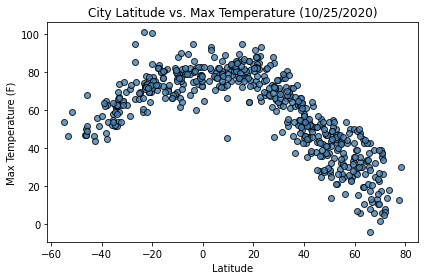

In [18]:
# Set the x and y axis values
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors="steelblue", edgecolors="black", alpha=0.8)

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
current_date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/lat_temp_scatter.png")
plt.show()

## Observation from Latitude vs. Temperature Scatter Plot

* It could be observed from the plot above that the temperature is higher at equator (latitude =0) and it reduces as we go further away from equator.

## Latitude vs. Humidity Plot

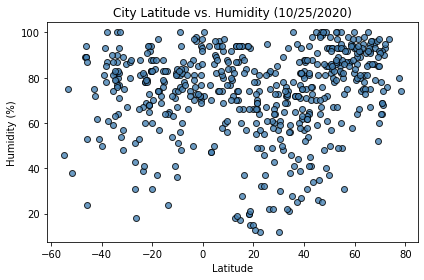

In [19]:
# Set the x and y axis values
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors="steelblue", edgecolors="black", alpha=0.8)

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({current_date})")

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/lat_humidity_scatter.png")
plt.show()

## Observation from Latitude vs. Humidity Scatter Plot

* It could be observed from the plot above that there isn't a strong relationship between Latitude and Humidity (%).

## Latitude vs. Cloudiness Plot

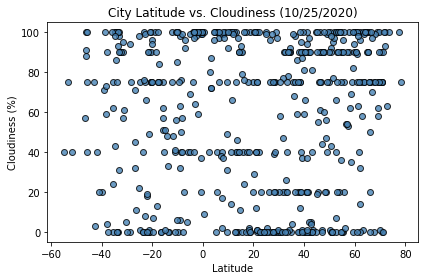

In [20]:
# Set the x and y axis values
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors="steelblue", edgecolors="black", alpha=0.8)

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/lat_cloudiness_scatter.png")
plt.show()

## Observation from Latitude vs. Cloudiness Scatter Plot

* It could be observed from the plot above that there isn't a strong relationship between Latitude and Cloudiness (%).

## Latitude vs. Wind Speed Plot

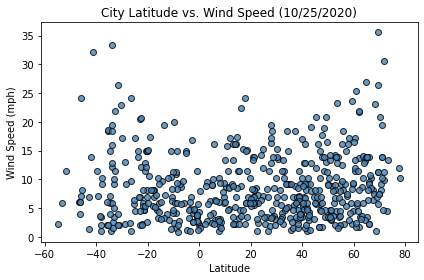

In [21]:
# Set the x and y axis values
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors="steelblue", edgecolors="black", alpha=0.8)

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/lat_wind_speed_scatter.png")
plt.show()

## Observation from Latitude vs. Wind Speed Scatter Plot

* It could be observed from the plot above that there isn't a strong relationship between Latitude and Wind Speed (mph).

## Linear Regression

In [23]:
# Filter out northern and southern hemisphere data
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

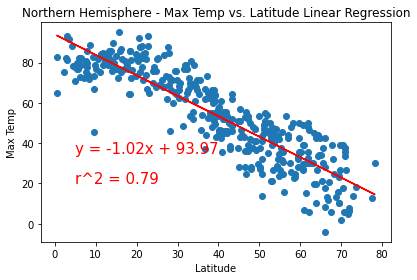

In [24]:
# Set the x and y axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.annotate(r_squared, (5,20),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/northern_hemisphere_lat_max_temp.png")
plt.show()

## Observation from Northern Hemisphere - Max Temp vs. Latitude Linear Regression

* It could be observed from the above linear regression model that the lower the latitude, the higher the temperature. The higher the latitude, the lower the temperature.(Relationship between Latitude and Max Temperature has negative slope trend with R^2 = 0.79 = 79%. The relationship accounts for 79% of the total variation)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

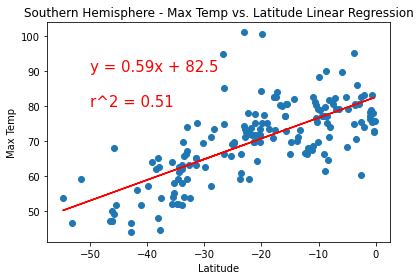

In [25]:
# Set the x and y axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.annotate(r_squared, (-50,80),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/southern_hemisphere_lat_max_temp.png")
plt.show()

## Observation from Southern Hemisphere - Max Temp vs. Latitude Linear Regression

* It could be observed from the above linear regression model that the lower the latitude, the lower the temperature. The higher the latitude, the higher the temperature.(Relationship between Latitude and Max Temperature has positive slope trend with R^2 = 0.51 = 51%. The relationship accounts for 51% of the total variation)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

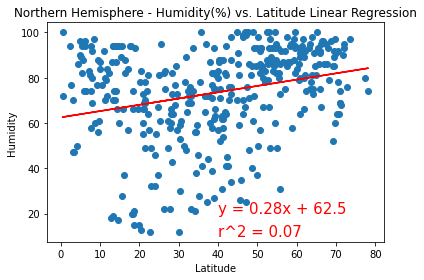

In [26]:
# Set the x and y axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.annotate(r_squared, (40,10),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/northern_hemisphere_lat_humidity.png")
plt.show()

## Observation from Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression

* It could be observed from the above linear regression model that there isn't a strong relationship between latitude and humidity. (Relationship between Latitude and Humidity (%) has positive slope trend with R^2 = 0.07 = 7%. The relationship accounts only for 7% of the total variation)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

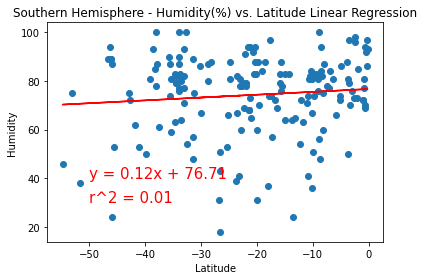

In [27]:
# Set the x and y axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.annotate(r_squared, (-50,30),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/southern_hemisphere_lat_humidity.png")
plt.show()

## Observation from Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression

* It could be observed from the above linear regression model that there isn't a strong relationship between latitude and humidity. (Relationship between Latitude and Humidity (%) has positive slope trend with R^2 = 0.01 = 1%. The relationship accounts only for 1% of the total variation)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

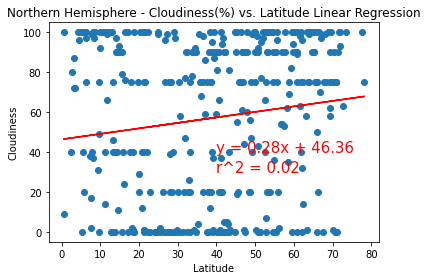

In [28]:
# Set the x and y axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.annotate(r_squared, (40,30),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/northern_hemisphere_lat_cloudiness.png")
plt.show()

## Observation from Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

* It could be observed from the above linear regression model that there isn't a strong relationship between latitude and cloudiness. (Relationship between Latitude and Cloudiness (%) has positive slope trend with R^2 = 0.02 = 2%. The relationship accounts only for 2% of the total variation)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

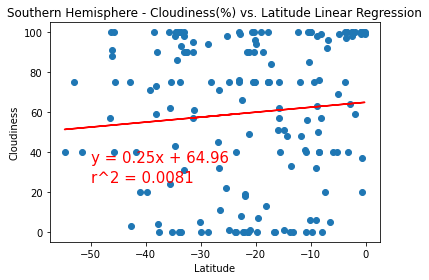

In [29]:
# Set the x and y axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,4)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.annotate(r_squared, (-50,25),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')

# Save and display the plot
plt.tight_layout()
plt.savefig("output_data/southern_hemisphere_lat_cloudiness.png")
plt.show()

## Observation from Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

* It could be observed from the above linear regression model that there isn't a strong relationship between latitude and cloudiness. (Relationship between Latitude and Cloudiness (%) has positive slope trend with R^2 = 0.0081 = 0.8%. The relationship accounts only for 0.8% of the total variation)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression